Lab: Stock Performance in August 2025

In this Lab, you will inves gate diﬀerent stock performances in August 2025. A cker of a stock is
its cker symbol, which is a unique grouping of le ers that iden fies a specific company. For
example, Apple has a cker symbol of "AAPL”.
For the Lab, the stocks ( ckers) are NVIDIA (NVDA), Apple (AAPL), Microso (MSFT).

In [139]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [140]:
ticker = ["NVDA", "AAPL", "MSFT"]
start_date = date(2025, 8, 1)
end_date = date(2025, 8, 31)
# Download for each ticker
data_list = []
dates_list = []
for t in ticker:
    # You only need to use the first column of data.
    download = yf.download(t, start=start_date, end=end_date)
    download = download.iloc[:, 0]
    data_list.append(download)
    dates_list.append(download.index.day)

# Convert to arrays
data_arrays = [np.array(data) for data in data_list]
dates_arrays = [np.array(date) for date in dates_list]

/tmp/ipython-input-1755982886.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(t, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1755982886.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(t, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1755982886.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  download = yf.download(t, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Display the data

In [141]:
data_arrays

[array([173.71020508, 179.98985291, 178.24993896, 179.40988159,
        180.7598114 , 182.68969727, 182.04972839, 183.14967346,
        181.57975769, 182.00973511, 180.43981934, 181.99972534,
        175.63009644, 175.3901062 , 174.97012329, 177.97996521,
        179.79986572, 181.75975037, 181.58976746, 180.15983582,
        174.17016602]),
 array([202.15058899, 203.11949158, 202.68995667, 213.008255  ,
        219.78056335, 229.0900116 , 227.17999268, 229.6499939 ,
        233.33000183, 232.77999878, 231.58999634, 230.88999939,
        230.55999756, 226.00999451, 224.8999939 , 227.75999451,
        227.16000366, 229.30999756, 230.49000549, 232.55999756,
        232.13999939]),
 array([523.24981689, 534.76092529, 526.8838501 , 524.07849121,
        519.98522949, 521.18322754, 520.91369629, 528.37139893,
        519.72564697, 521.62249756, 519.31628418, 516.25128174,
        508.93334961, 504.89001465, 504.23999023, 507.23001099,
        504.26000977, 502.04000854, 506.73999023, 509.64

In [142]:
dates_arrays

[array([ 1,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25,
        26, 27, 28, 29], dtype=int32),
 array([ 1,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25,
        26, 27, 28, 29], dtype=int32),
 array([ 1,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25,
        26, 27, 28, 29], dtype=int32)]

Each cker should have 2 charts: one line chart shows the stock prices in August and the other
bar chart shows the daily change. Note that if the change is posi ve, it should be green,
otherwise it should be red. Hint: you can use np.diﬀ().

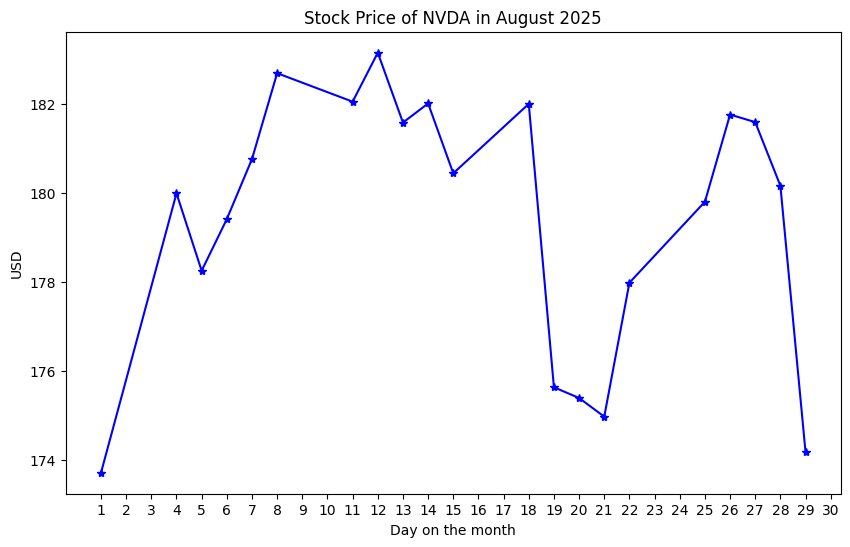

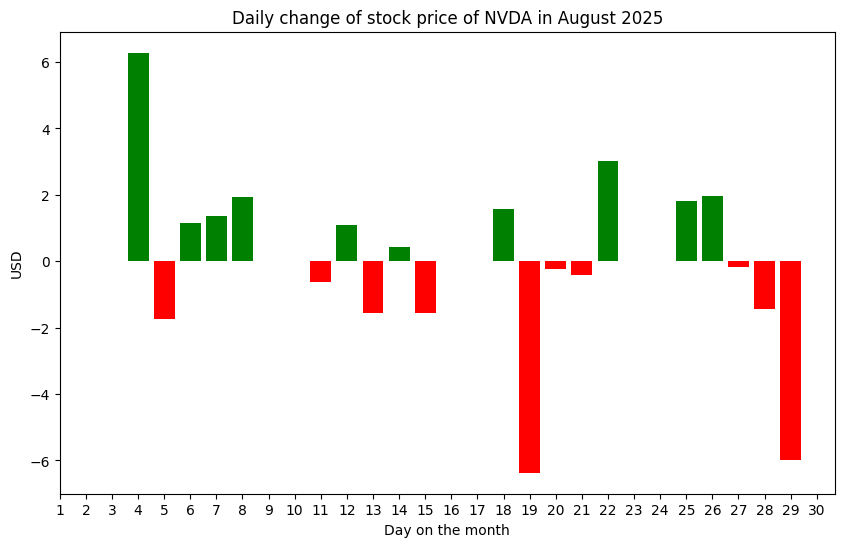

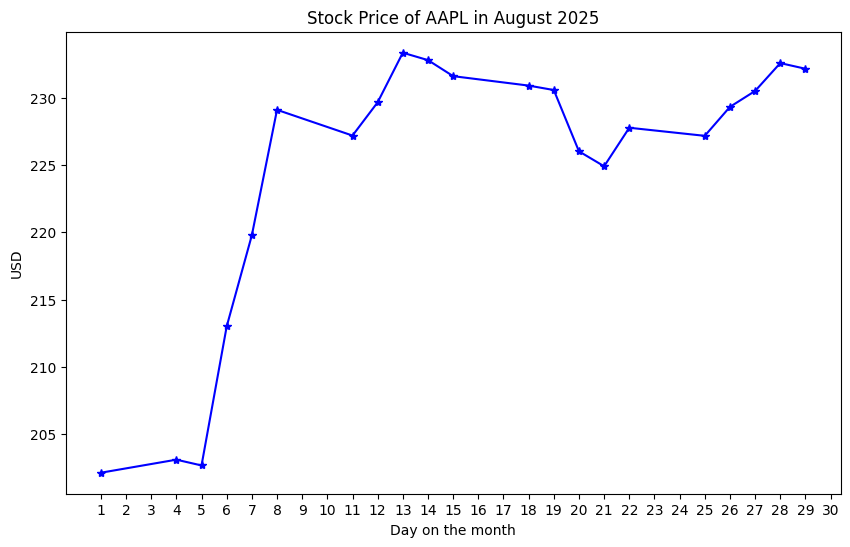

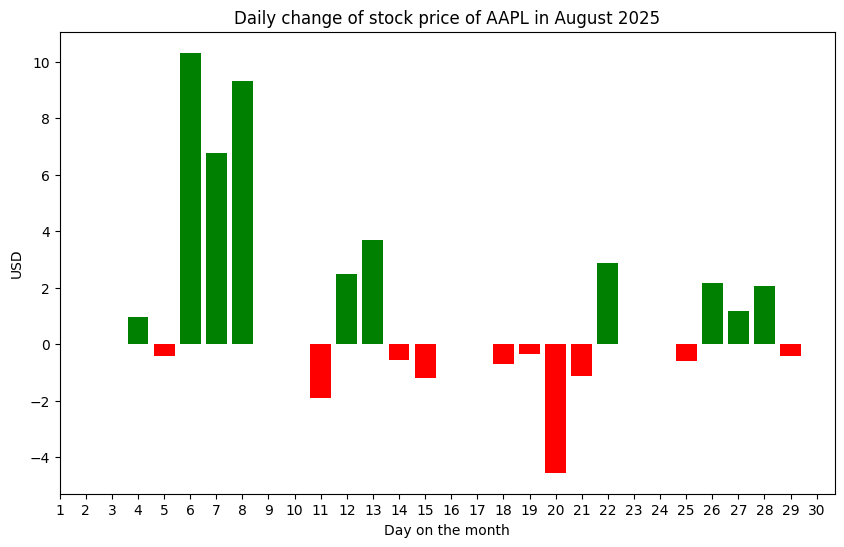

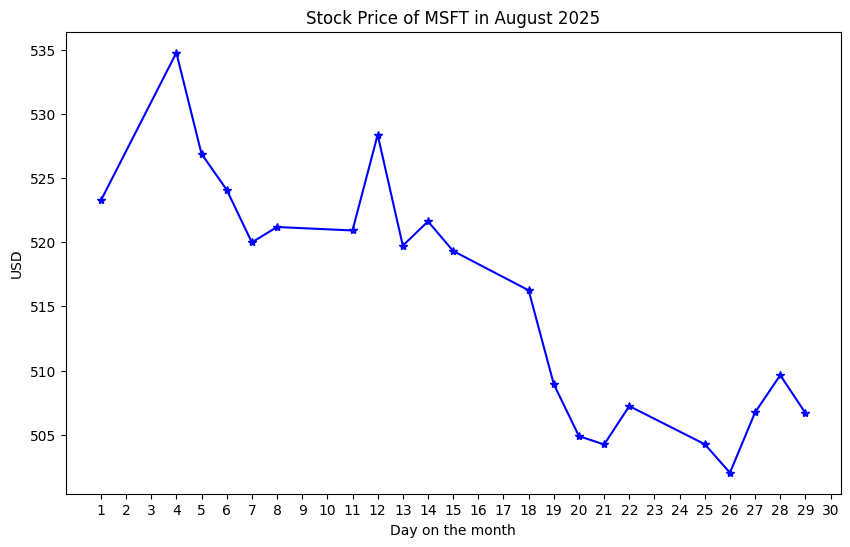

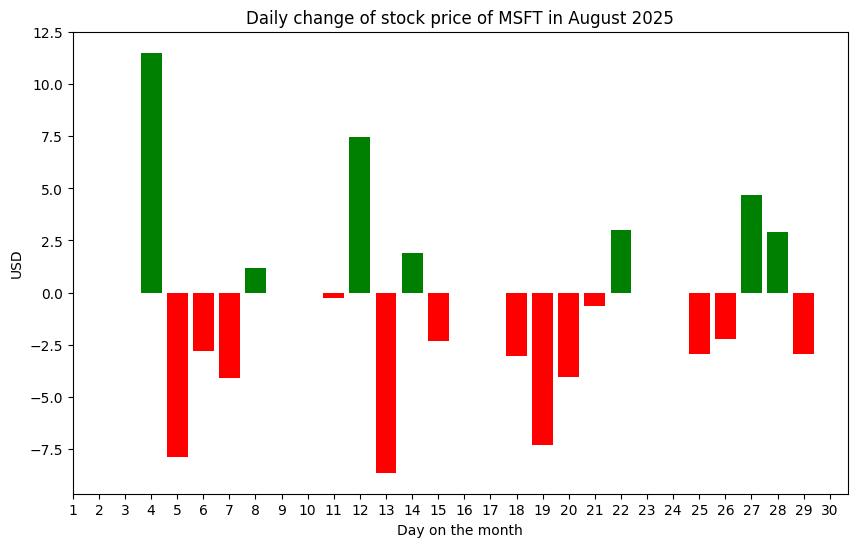

In [143]:
for i in range(len(data_arrays)):
  # Line chart
  plt.figure(figsize=(10, 6))
  plt.plot(dates_arrays[i], data_arrays[i], marker='*', color='blue')
  plt.xticks(np.arange(start_date.day, end_date.day, 1))
  plt.title(f'Stock Price of {ticker[i]} in August 2025')
  plt.xlabel('Day on the month')
  plt.ylabel('USD')
  plt.show()

  # Bar Chart (if negative result then the bar is red)
  daily_change = np.diff(data_arrays[i])  # compute daily chance
  plt.figure(figsize=(10, 6))
  # why dates_arrays[i][1:] is because the np.diff()
  # computes the difference of any two consecutive days
  # so the x-axis must start from day 2
  bar_colors = ['green' if change > 0 else 'red' for change in daily_change]
  plt.bar(dates_arrays[i][1:], daily_change, color=bar_colors)
  plt.xticks(np.arange(start_date.day, end_date.day, 1))
  plt.title(f'Daily change of stock price of {ticker[i]} in August 2025')
  plt.xlabel('Day on the month')
  plt.ylabel('USD')
  plt.show()

Finally, in order to show 3 charts in 1 graph, their stock prices should be scaled to [0-1]. The
marker and color should be unique for each cker in this chart.

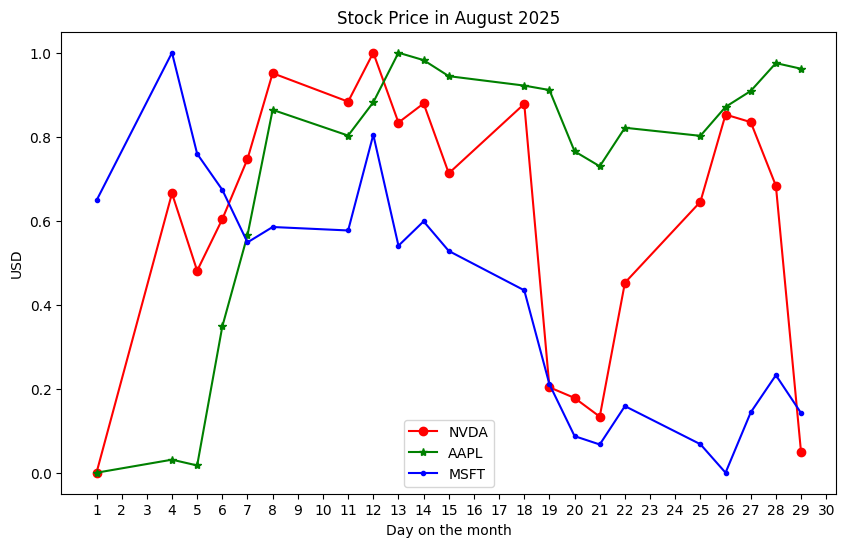

In [144]:
# Scale stock price
plt.figure(figsize=(10, 6))
plt.xticks(np.arange(start_date.day, end_date.day, 1))
plt.title(f'Stock Price in August 2025')
plt.xlabel('Day on the month')
plt.ylabel('USD')
colors = ['red', 'green', 'blue']
markers = ['o', '*', '.']
for i in range(len(data_arrays)):
  # Line chart
  max_values, min_values = data_arrays[i].max(), data_arrays[i].min()
  normalized_arrays = [(values - min_values) / (max_values - min_values) for values in data_arrays[i]]
  plt.plot(dates_arrays[i], normalized_arrays, marker=markers[i], color=colors[i], label=f'{ticker[i]}')

plt.legend()